# This workbook contains the models trained using data without 'default column'

In [2]:
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r"C:\Users\akshayd6\Desktop\MyModels\Loan Default Prediction Capstone\Dataset with default.csv",index_col = 'Customer_id')

In [6]:
df.head()

,age,employee_variation_rate,consumer_price_index,consumer_confidence_index,euribor,number_employed,duration,job,education,marital__married,...,Wilson,Woodbury,Woodland,Woodstock,Woonsocket,Yonkers,York,Yucaipa,Yuma,target
Customer_id,,,,,,,,,,,,,,,,,,,,,
1,56,1.1,93.994,-36.4,4.857,5191.0,307,6,4,1,...,0,0,0,0,0,0,0,0,0,0
2,45,1.1,93.994,-36.4,4.857,5191.0,198,6,3,1,...,0,0,0,0,0,0,0,0,0,0
3,59,1.1,93.994,-36.4,4.857,5191.0,139,9,6,1,...,0,0,0,0,0,0,0,0,0,0
4,41,1.1,93.994,-36.4,4.857,5191.0,217,10,5,1,...,0,0,0,0,0,0,0,0,0,0
5,24,1.1,93.994,-36.4,4.857,5191.0,380,5,6,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df.shape

(37084, 607)

In [8]:
df.target.value_counts(normalize = True)

0    0.886528
1    0.113472
Name: target, dtype: float64

>We are going to train the model by using scaled and unscalled data and compare difference in accuracy.

## Scaling the data

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
num_columns = ['age','employee_variation_rate','consumer_price_index','consumer_confidence_index','euribor',
              'number_employed','duration']
cat_columns = ['job','marital','education','default','housing','contact','Campaign_month',
          'day_of_week','campaign','previous','City_Name','default']

In [11]:
tb_scaled = df[num_columns]

In [12]:
tb_scaled.head()

,age,employee_variation_rate,consumer_price_index,consumer_confidence_index,euribor,number_employed,duration
Customer_id,,,,,,,
1,56,1.1,93.994,-36.4,4.857,5191.0,307
2,45,1.1,93.994,-36.4,4.857,5191.0,198
3,59,1.1,93.994,-36.4,4.857,5191.0,139
4,41,1.1,93.994,-36.4,4.857,5191.0,217
5,24,1.1,93.994,-36.4,4.857,5191.0,380


In [13]:
scaler = StandardScaler()
scaler.fit(tb_scaled)
scaled = scaler.transform(tb_scaled)

In [14]:
scaled_num_columns = pd.DataFrame(scaled)
scaled_num_columns = scaled_num_columns.set_index(df.index)

In [15]:
scaled_num_columns.head()

,0,1,2,3,4,5,6
Customer_id,,,,,,,
1,1.586388,0.648404,0.722446,0.888187,0.712439,0.331618,0.404735
2,0.499122,0.648404,0.722446,0.888187,0.712439,0.331618,-0.208708
3,1.882915,0.648404,0.722446,0.888187,0.712439,0.331618,-0.540755
4,0.103752,0.648404,0.722446,0.888187,0.712439,0.331618,-0.101778
5,-1.576569,0.648404,0.722446,0.888187,0.712439,0.331618,0.815573


In [16]:
unscaled = df.copy()
unscaled.drop(columns = num_columns,inplace = True)

In [17]:
unscaled.head()

,job,education,marital__married,marital__single,default__yes,housing__yes,contact__telephone,Campaign_month__aug,Campaign_month__dec,Campaign_month__jul,...,Wilson,Woodbury,Woodland,Woodstock,Woonsocket,Yonkers,York,Yucaipa,Yuma,target
Customer_id,,,,,,,,,,,,,,,,,,,,,
1,6,4,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,3,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,6,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,5,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,6,0,1,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
scaled_data = pd.concat([scaled_num_columns,unscaled],axis = 1)

In [19]:
scaled_data.rename(columns = {0:'age',1:'employee_variation_rate',2:'consumer_price_index',
                             3:'consumer_confidence_index',4:'euribor',5:'number_employed',6:'duration'},inplace = True)

In [20]:
scaled_data.tail()

,age,employee_variation_rate,consumer_price_index,consumer_confidence_index,euribor,number_employed,duration,job,education,marital__married,...,Wilson,Woodbury,Woodland,Woodstock,Woonsocket,Yonkers,York,Yucaipa,Yuma,target
Customer_id,,,,,,,,,,,,,,,,,,,,,
37080,2.871339,-0.753784,2.058695,-2.227359,-1.495816,-2.818158,0.556689,2,6,1,...,0,0,0,0,0,0,0,0,0,1
37081,0.597964,-0.753784,2.058695,-2.227359,-1.495816,-2.818158,0.832457,10,6,1,...,0,0,0,0,0,0,0,0,0,0
37082,1.586388,-0.753784,2.058695,-2.227359,-1.495816,-2.818158,-0.259359,2,5,1,...,0,0,0,0,0,0,0,0,0,0
37083,0.400279,-0.753784,2.058695,-2.227359,-1.495816,-2.818158,1.164504,5,6,1,...,0,0,0,0,0,0,0,0,0,1
37084,2.871339,-0.753784,2.058695,-2.227359,-1.495816,-2.818158,0.022037,2,6,1,...,0,0,0,0,0,0,0,0,0,0


## Test Train split - Unscaled data

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop(columns = ['target'],axis = 1)
y = df['target']

In [23]:
print("X-shape:",X.shape)
print("y-shape:",y.shape)

X-shape: (37084, 606)
y-shape: (37084,)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state = 42)

In [25]:
print(y_train.value_counts())
print(y_train.value_counts(normalize = True))

0    24599
1     3214
Name: target, dtype: int64
0    0.884443
1    0.115557
Name: target, dtype: float64


>Here we can see that the target variable is imbalaced ~88% - no and ~12% - yes. So we must make this a balanced sample by using SMOTE.

## Test Train split - Scaled data

In [26]:
X1 = scaled_data.drop(columns = ['target'],axis = 1)
y1 = scaled_data['target']

In [27]:
print("X-shape:",X1.shape)
print("y-shape:",y1.shape)

X-shape: (37084, 606)
y-shape: (37084,)


In [28]:
sX_train, sX_test, sy_train, sy_test = train_test_split(X1, y1, test_size=0.25,random_state = 42)

In [29]:
print(sy_train.value_counts())
print(sy_train.value_counts(normalize = True))

0    24599
1     3214
Name: target, dtype: int64
0    0.884443
1    0.115557
Name: target, dtype: float64


>Here we can see that the target variable is imbalaced ~88% - no and ~12% - yes. So we must make this a balanced sample by using SMOTE.

## SMOTE for unscaled data

In [30]:
from imblearn.over_sampling import SMOTE 

In [31]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [32]:
print("X-shape:",X_res.shape)
print("y-shape:",y_res.shape)

X-shape: (49198, 606)
y-shape: (49198,)


In [33]:
print(y_res.value_counts())
print(y_res.value_counts(normalize = True))

0    24599
1    24599
Name: target, dtype: int64
0    0.5
1    0.5
Name: target, dtype: float64


>Here the data was oversampled and now the ratio of yes:no is 1:1

## SMOTE for scaled data

In [34]:
sm1 = SMOTE(random_state=42)
sX_res, sy_res = sm1.fit_resample(sX_train, sy_train)

In [35]:
print("X-shape:",sX_res.shape)
print("y-shape:",sy_res.shape)

X-shape: (49198, 606)
y-shape: (49198,)


In [36]:
print(y_res.value_counts())
print(y_res.value_counts(normalize = True))

0    24599
1    24599
Name: target, dtype: int64
0    0.5
1    0.5
Name: target, dtype: float64


>Here the data was oversampled and now the ratio of yes:no is 1:1

## Logistic Regression using unscaled data

In [37]:
y_res.value_counts()

0    24599
1    24599
Name: target, dtype: int64

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr = LogisticRegression()
lr.fit(X_res,y_res)

LogisticRegression()

In [40]:
lr.score(X_test,y_test)

0.8298996871966347

### Classification Report

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [42]:
lr_preds = lr.predict(X_test)

In [43]:
print(classification_report(y_test, lr_preds))

              precision    recall  f1-score   support

           0       0.98      0.82      0.90      8277
           1       0.38      0.89      0.53       994

    accuracy                           0.83      9271
   macro avg       0.68      0.86      0.71      9271
weighted avg       0.92      0.83      0.86      9271



### Confusion martrix

In [44]:
cm = confusion_matrix(y_test,lr_preds)
conf_mat = pd.DataFrame(cm,index = ['True(0)','True(1)'],columns = ['Predicted(0)','Predicted(1)'])
conf_mat

,Predicted(0),Predicted(1)
True(0),6812,1465
True(1),112,882


### ROC_AUC - Unscaled LR model

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

optimal threshold:  0.4796189884612982


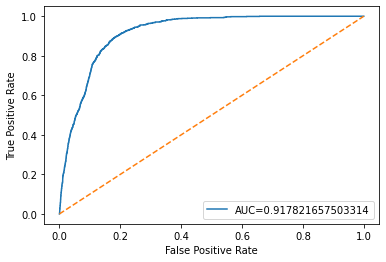

In [46]:
y_pred_proba = lr.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#blue_line
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr,_ = roc_curve(y_test, random_probs, pos_label=1)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print("optimal threshold: ",optimal_threshold)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.show()

## Model Explainability

In [47]:
import shap

In [48]:
feature_names = list(X_train.columns)

In [49]:
explainer = shap.Explainer(lr, X_train, feature_names = feature_names)
shap_values = explainer(X_test)

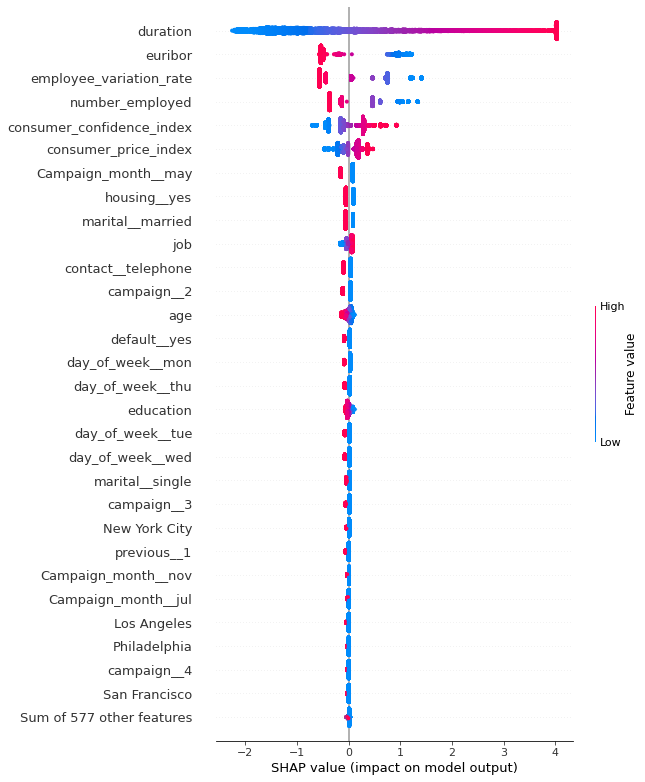

In [50]:
shap.plots.beeswarm(shap_values,max_display = 30)#, X_test_array, feature_names=vectorizer.get_feature_names())

## Conclusion:

>Here we can see that default is not an important feature. so it not necessary to include that feature in the model.